In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Variability of the Sample Average

In [19]:
united = Table.read_table('united_summer2015.csv')

In [20]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [21]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [22]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.64989125
Population SD: 39.480199851609314
SD of sample means: 1.9990891244635487


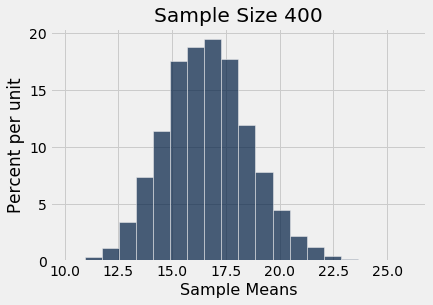

In [23]:
plot_sample_means(400)

## SD of 0/1 Population ##

In [2]:
# Population of size 10

ones = 2 # thus 8 zeros
zero_one_population = np.append(np.ones(ones), np.zeros(10-ones))
zero_one_population

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
np.std(zero_one_population)

0.4000000000000001

In [4]:
def zero_one_population_sd(k):
    """Return Sd of pop of k ones and 10-k zeros"""
    population = np.append(np.ones(k), np.zeros(10-k))
    return np.std(population)

In [5]:
zero_one_population_sd(2)

0.4000000000000001

In [6]:
pop_sds = make_array()
for i in np.arange(1, 10):
    pop_sds = np.append(pop_sds, zero_one_population_sd(i))

In [10]:
sd_table = Table().with_columns(
    'Population Proportion of Ones', np.arange(1, 10)/10,
    'Population SD', pop_sds
)

In [11]:
sd_table

Population Proportion of Ones,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


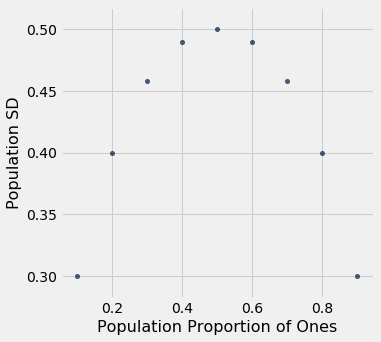

In [12]:
sd_table.scatter(0)

In [13]:
2*(0.5/(1004**0.5))

0.031559720154890156

In [14]:
2*(0.5/(10000**0.5))

0.01